# Lecture 3: Joint Probability

## Learning Objectives

By the end of this lecture, you should be able to:
- Calculate marginal distributions from a joint distribution of random variables.
- Describe the probabilistic consequences of working with independent random variables.
- Calculate and describe covariance in multivariate cases (i.e., with more than one random variable).
- Calculate and describe two mainstream correlation metrics: Pearson's correlation and Kendall's $\tau_K$.

(discrete-joint-distributions)=
## 1. Joint Distributions

This lecture will explore cases simultaneously involving multiple random variables. Hence, let us begin with the concept of **joint distribution**. So far, we have only considered one random variable at a time. Its distribution is called **univariate** because there is just one variable. However, we very often have more than one random variable.

```{admonition} Definition of Joint Distribution
:class: tip
A joint distribution is a formal probability distribution involving two or more simultaneous random variables, either discrete or continuous, in a random process or system. This joint distribution has to encompass all possible outcomes for these two or more random variables.
```

``` {figure} img/two_coins.png
:height: 200px
:name: coin
Two coins
```

Let us start with an example involving coin tosses. Thus, consider **two independent fair coins** with two possible outcomes each: heads ($\text{H}$) or tails ($\text{T}$). The possible **joint outcomes** are: $\texttt{HH}$, $\texttt{HT}$, $\texttt{TH}$, $\texttt{TT}$, each with a probability $0.25$. We can visualize this as a joint distribution in {numref}`joint-dist-coins`.

```{list-table} Joint probability distribution of two independent coin tosses
:header-rows: 1
:name: joint-dist-coins

* - $X/Y$ 
  - $\texttt{H}$ 
  - $\texttt{T}$ 
* - $\texttt{H}$ 
  - 0.25
  - 0.25
* - $\texttt{T}$ 
  - 0.25
  - 0.25
```

Note that an outcome in {numref}`joint-dist-coins` consists of a pair of values. The sum of all probabilities still adds to 1 since this is **proper** a probability distribution. Moreover, we could set the following **binary random variables** (since each one could only have two outcomes, $\texttt{H}$ or $\texttt{T}$):

```{math}
\begin{gather*}
X = \text{First coin's outcome} \\
Y = \text{Second coin's outcome.}
\end{gather*}
```

Therefore, for example via the independence property shown in Equation {eq}`independence`, one cell from {numref}`joint-dist-coins` can be written as:

```{math}
\begin{align*}
P(X = \texttt{H} \cap Y = \texttt{H}) &= P(X = \texttt{H}) \cdot P(Y = \texttt{H}) \qquad \qquad \text{since both tosses are independent} \\
&= 0.5 \cdot 0.5  \qquad \qquad \text{both coins are fair} \\
&= 0.25.
\end{align*}
```

Note this is not really any different from what we have already seen. We can still write this as an **univariate distribution with four categories**. This is useful to remember when we are calculating probabilities. Thus, alternatively, we can define the following random variable:

$$Z = \text{Outcomes obtained when tossing two independent coins,}$$

whose probability mass function (PMF) is shown in {numref}`pmf-z-coins`.

```{list-table} Probability mass function (PMF) of random variable $Z$ for two independent coin tosses 
:header-rows: 1
:name: pmf-z-coins

* - $Z$
  - Probability
* - $\texttt{HH}$
  - 0.25
* - $\texttt{HT}$
  - 0.25
* - $\texttt{TH}$
  - 0.25
* - $\texttt{TT}$
  - 0.25
```

```{important} 
The PMF of $Z$ in {numref}`pmf-z-coins` considers the order in which we obtain the outcomes.
```

Viewing the distribution in {numref}`joint-dist-coins` as a (2-dimensional) matrix, instead of a (1-dimensional) vector as in {numref}`pmf-z-coins`, is more useful when determining the properties of individual random variables. Thus, in practice, many cases will require multivariate distributions.

### 1.1. Example: Length of Stay Versus Gang Demand

Throughout this lecture, we will work with the following joint distribution of **length of stay** of a ship and its **gang demand**. 

``` {figure} img/ship.png
:height: 350px
:name: ship
A cargo ship
```

Consider an example that a Vancouver port faces with "*gang demand*." Whenever a ship arrives at the port of Vancouver, they request a certain number of "*gangs*" (groups of people) to help unload the ship. Let us suppose the number of $\text{Gangs}$ requested by a ship has the following PMF:

In [1]:
library(tidyverse)
library(knitr)
library(kableExtra)
library(IRdisplay)

── Attaching core tidyverse packages ─────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [2]:
los <- tribble(
  ~ngang, ~p,
  1, 0.2,
  2, 0.4,
  3, 0.3,
  4, 0.1,
)

kable(los,
  col.names = c("Number of Gangs", "Probability"), align = "cc", format = "html") %>%
  as.character() %>% 
  display_html()

Number of Gangs 
 Probability 
 
 
 
 
 1 
 0.2 
 
 
 2 
 0.4 
 
 
 3 
 0.3 
 
 
 4 
 0.1

Furthermore, each ship will stay at port for a random number of days, which is the length of stay ($\text{LOS}$), according to the following distribution:

In [3]:
los <- tribble(
  ~ndays, ~p,
  1, 0.25,
  2, 0.35,
  3, 0.2,
  4, 0.1,
  5, 0.1
)

kable(los,
  col.names = c("Length of Stay (LOS) in Days", "Probability"), align = "cc", format = "html") %>%
  as.character() %>% 
  display_html()

Length of Stay (LOS) in Days 
 Probability 
 
 
 
 
 1 
 0.25 
 
 
 2 
 0.35 
 
 
 3 
 0.20 
 
 
 4 
 0.10 
 
 
 5 
 0.10

```{important} 
The above PMF can be conveyed as a plot, table, or mathematical function; all options are correct. There is no significance (not statistically speaking!).
```

Given the above information coming from the $\text{LOS}$ PMF, here is a question we might be interested in:

> What is the probability that a ship requires 4 gangs **AND** will stay in port for 5 days?

There is some bad news here. First, the information provided by both separate PMFs ($\text{Gangs}$ and $\text{LOS}$) is not sufficient to answer this question. 

Of course, there is a 10% chance of needing 4 gangs **in the absence of other information**, and a 10% chance of staying for 5 days **in the absence of other information**. We could try multiplying these numbers together, giving us 1%. But what if more extended stays require fewer gangs because there is more time to do the work? In that case, it might be extremely unlikely to find the combination of needed 4 gangs and stay for 5 days: perhaps 0.1% or lower. Or maybe something else is going on, and the probability is higher than 1%! Who knows?

In this and the following lecture, we will focus on these types of questions. Specifically, this lecture will focus on the question above (**4 gangs AND 5 days**), and {doc}`04_lecture-conditional` will focus on a slightly different question: 

> **IF** you already know that the length of stay is 5 days, what is the probability of needing 4 gangs?

For now, let us proceed with joint distributions. Above, we have the PMFs for the number of $\text{Gangs}$ and $\text{LOS}$ **individually**. Formally, these individual distributions are called **marginal distributions**.

```{admonition} Definition of Marginal Distribution
:class: tip
**In a random system/process with more than one random variable**, the distribution of a standalone variable is called marginal distribution (sometimes just "*marginal*" or "*margin*"). 

We use the word "marginal" to emphasize that the distribution is being considered **in isolation** from other related variables in the same random process or system.
```

Since we have 4 possibilities for the number of $\text{Gangs}$, we have 4 probabilities that add up to 1; and since we have 5 possibilities for $\text{LOS}$, we have 5 probabilities that add up to 1. But these 9 probabilities do not tell the whole story. So how many do we need? We need a probability for **every possible combination** of the number of $\text{LOS}$ and $\text{Gangs}$. In this case, $5 \times 4 = 20$ probabilities (that again add up to 1). We might display these 20 probabilities in a $5 \times 4$ joint probability table:

In [4]:
raw_data <- data.frame(
  LOS = c(rep(1, 4), rep(2, 4), rep(3, 4), rep(4, 4), rep(5, 4)), Gangs = rep(1:4, 5),
  Probability = c(
    0.00170, 0.04253, 0.12471, 0.08106,
    0.02664, 0.16981, 0.13598, 0.01757,
    0.05109, 0.11563, 0.03203, 0.00125,
    0.04653, 0.04744, 0.00593, 0.00010,
    0.07404, 0.02459, 0.00135, 0.00002
  )
)

joint_distribution <- raw_data %>%
  mutate(
    LOS = str_c("LOS = ", LOS),
    Gangs = str_c("Gangs = ", Gangs)
  ) %>%
  pivot_wider(id_cols = LOS, names_from = Gangs, values_from = Probability) %>%
  column_to_rownames("LOS") %>%
  as.matrix()

In [5]:
joint_distribution

Gangs = 1 Gangs = 2 Gangs = 3 Gangs = 4
LOS = 1 0.00170   0.04253   0.12471   0.08106  
LOS = 2 0.02664   0.16981   0.13598   0.01757  
LOS = 3 0.05109   0.11563   0.03203   0.00125  
LOS = 4 0.04653   0.04744   0.00593   0.00010  
LOS = 5 0.07404   0.02459   0.00135   0.00002

We can make sure these probabilities add up to 1 via the function `sum()`:

In [6]:
sum(joint_distribution)

[1] 1

```{admonition} Note
:class: warning
Going from the initial marginal distributions to the joint distribution is not a straightforward procedure. It requires more advanced statistical techniques. Specifically, in this case, we use a **Gaussian copula**, which is common in risk management. 

Roughly speaking, a copula allows us to understand the dependency structure in a multivariate random system or process in which the marginal distributions play a crucial role. Since the construction of joint distributions via copulas is out of the scope of this course, we will use the resulting `joint_distribution` "as is" to illustrate this lecture's concepts.
```

Moving along with the corresponding joint distribution, we can see the probability of needing 4 $\text{Gangs}$ and $\text{LOS}$ of 5 days is less than 1% in this case, i.e.:

$$P(\text{LOS} = 5 \cap \text{Gangs} = 4) = 0.00002.$$

Now, we might wonder: 

> Could the 20 numbers in the matrix `joint_distribution` be absolutely **ANY** probabilities between 0 and 1?

No, they cannot be any probability between 0 and 1. They are restricted by the fact that they will need to add up to 1 (recall {ref}`law-total-probability`!). Furthermore, there are other restrictions:

- We already specified the marginal distributions of the number of $\text{Gangs}$ and $\text{LOS}$ earlier. Therefore, we need the joint distribution above to be consistent with those marginal distributions (otherwise, we would likely break the probability rules from {doc}`01_lecture-uncertainty`). 
- If we already said the **marginal probability** of needing 4 $\text{Gangs}$ is 10%, the joint distribution **should not contradict that information** or something would be wrong. This is why multivariate methods such as a Gaussian copula are used to reflect this class of facts.

### 1.2. Calculating Marginal Distributions from the Joint Distribution

We have just specified a joint distribution of $\text{LOS}$ and $\text{Gangs}$. But beforehand, we specified a distribution for these variables individually. Therefore:

- If you have a joint distribution, then the marginal distribution of each individual variable follows as a consequence.
- If you have the marginal distribution of each individual variable, you still do not have enough information to form the joint distribution between the variables.

In the case of discrete random variables, such as in our cargo ship example, calculating a marginal distribution involves adding up the probabilities corresponding to standalone outcomes of $\text{LOS}$ and $\text{Gangs}$. 

Let us start with the marginal distribution of $\text{LOS}$. Thus, using our `joint_distribution`:

In [7]:
joint_distribution

Gangs = 1 Gangs = 2 Gangs = 3 Gangs = 4
LOS = 1 0.00170   0.04253   0.12471   0.08106  
LOS = 2 0.02664   0.16981   0.13598   0.01757  
LOS = 3 0.05109   0.11563   0.03203   0.00125  
LOS = 4 0.04653   0.04744   0.00593   0.00010  
LOS = 5 0.07404   0.02459   0.00135   0.00002

Now, we can compute $P(\text{LOS} = 1)$. Thus, there are four ways this could happen: 

-  $\text{LOS} = 1$ and $\text{Gangs} = 1$.
-  $\text{LOS} = 1$ and $\text{Gangs} = 2$.
-  $\text{LOS} = 1$ and $\text{Gangs} = 3$.
-  $\text{LOS} = 1$ and $\text{Gangs} = 4$.

So, to find the marginal probability $P(\text{LOS} = 1)$, we need to add up those four joint probabilities. Looking at our `joint_distribution` of $\text{LOS}$ and $\text{Gangs}$, this corresponds to summing the first row of the joint probability table.

```{math}
\begin{align*}
P(\text{LOS} = 1) &= P(\text{LOS} = 1 \cap \text{Gangs} = 1) + P(\text{LOS} = 1 \cap \text{Gangs} = 2) +  \\
& \quad \qquad P(\text{LOS} = 1 \cap \text{Gangs} = 3) + P(\text{LOS} = 1 \cap \text{Gangs} = 4) \\
&= 0.00170 + 0.04253 + 0.12471 + 0.08106 \\
&= 0.25.
\end{align*}
```

We have $P(\text{LOS} = 1)$, but we would also need $P(\text{LOS} = 2)$, $P(\text{LOS} = 3)$, etc. It follows that the marginal distribution of $\text{LOS}$ can be obtained by adding up each row in our `joint_distribution` (we use the function `rowSums()`).

In [8]:
rowSums(joint_distribution) %>%
  kable(col.names = "Probability", align = "c") %>%
  column_spec(1, bold = TRUE) %>%
  as.character() %>%
  display_html()

Probability 
 
 
 
 
 LOS = 1 
 0.25 
 
 
 LOS = 2 
 0.35 
 
 
 LOS = 3 
 0.20 
 
 
 LOS = 4 
 0.10 
 
 
 LOS = 5 
 0.10

Note that the distribution of $\text{LOS}$ is the same we had at the beginning of the lecture. Hence, our `joint_distribution` is **consistent** with the initial marginal distribution of $\text{LOS}$. 

Analogously, the marginal distribution of $\text{Gangs}$ can be obtained by summing the columns from our `joint_distribution` (we use function `colSums()`):

In [9]:
colSums(joint_distribution) %>%
  kable(col.names = "Probability", align = "c") %>%
  column_spec(1, bold = TRUE) %>%
  as.character() %>%
  display_html()

Probability 
 
 
 
 
 Gangs = 1 
 0.2 
 
 
 Gangs = 2 
 0.4 
 
 
 Gangs = 3 
 0.3 
 
 
 Gangs = 4 
 0.1

Also, the marginal distribution of $\text{Gangs}$ is the same we had at the beginning of the lecture. Thus, our `joint_distribution` is **consistent** with the initial marginal distribution of $\text{Gangs}$. 

```{important} 
It is crucial to highlight that there is more than one way to obtain a joint distribution. Any specific procedure will depend on factors such as the existing correlation between a given set of random variables.
```

Now, we will start with in-class questions via [**iClicker**](https://student.iclicker.com/).

```{exercise}
:label: lecture3-q1

Answer **TRUE** or **FALSE**:

We obtain a marginal distribution by summing the rows of a joint distribution; therefore, each row of a joint distribution must sum to 1.

**A.** TRUE

**B.** FALSE
```

## 2. Independence and Dependence Concepts

In practice, a big part of Data Science is about harvesting the relationship between the variables in our datasets. For instance, we might be interested in inferring what factors influence leisure expenditure in Canadian households with similar sociodemographic profiles (i.e., there might be some data **dependence**). Or maybe, what factors influence leisure expenditure in Canadian households with totally different sociodemographic profiles (i.e., there might be some data **independence**). 


### 2.1. Independence

Let $X$ and $Y$ be two random variables. Retaking {ref}`independent-events`, we say $X$ and $Y$ are **independent** if knowing something about one of them tells us nothing about the other. Analogous to Equation {eq}`independence`, a definition of $X$ and $Y$ being independent is the following:

```{math}
:label: independence-variables
P(X = x \cap Y = y) = P(X = x) \cdot P(Y = y), \text{for all } x \text{ and } y
```

```{important} 
What does Equation {eq}`independence-variables` tell us about a **hypothetical joint probability table** whose cells are $P(X = x \cap Y = y)$? 

Well, **if $X$ and $Y$ are independent**, we do not actually need the whole table! Instead, we only need the marginals of $X$ and $Y$. Therefore, the full joint distribution between $X$ and $Y$ is just the product of their respective marginal probabilities.
```

Note independence is not some property that you can specify separately from the joint PMF. Recall the joint PMF specifies everything about a given situation/process/system involving more than one random variable, including whether or not the random variables are independent.

Going back to our earlier example of two coin flips, recall we had this joint distribution:

```{math}
\begin{gather*}
X = \text{First coin's outcome} \\
Y = \text{Second coin's outcome.}
\end{gather*}
```

```{list-table} Joint probability distribution of two independent coin tosses
:header-rows: 1
:name: joint-dist-coins-2

* - $X/Y$
  - $\texttt{H}$ 
  - $\texttt{T}$ 
* - $\texttt{H}$ 
  - 0.25
  - 0.25
* - $\texttt{T}$ 
  - 0.25
  - 0.25
```

From the joint PMF in {numref}`joint-dist-coins-2`, we can see that the two coin flips are independent. The marginals are the following:

```{math}
\begin{align*}
P(X = \texttt{H}) &= P(X = \texttt{H} \cap Y = \texttt{H}) + P(X = \texttt{H} \cap Y = \texttt{T}) \\
&= 0.25 + 0.25 \\
&= 0.5 \\
P(X = \texttt{T}) &= P(X = \texttt{T} \cap Y = \texttt{H}) + P(X = \texttt{T} \cap Y = \texttt{T}) \\
&= 0.25 + 0.25 \\
&= 0.5 \\
P(Y = \texttt{H}) &= P(X = \texttt{H} \cap Y = \texttt{H}) + P(X = \texttt{T} \cap Y = \texttt{H}) \\
&= 0.25 + 0.25 \\
&= 0.5 \\
P(Y = \texttt{T}) &= P(X = \texttt{H} \cap Y = \texttt{T}) + P(X = \texttt{T} \cap Y = \texttt{T}) \\
&= 0.25 + 0.25 \\
&= 0.5.
\end{align*}
```

Moreover, we have that:

```{math}
\begin{align*}
P(X = \texttt{H} \cap Y = \texttt{H}) &= P(X = \texttt{H}) \cdot P(Y = \texttt{H}) \\ 
&= 0.5 \cdot 0.5 \\
&= 0.25 \\
P(X = \texttt{H} \cap Y = \texttt{T}) &= P(X = \texttt{H}) \cdot P(Y = \texttt{T}) \\ 
&= 0.5 \cdot 0.5 \\
&= 0.25 \\
P(X = \texttt{T} \cap Y = \texttt{H}) &= P(X = \texttt{T}) \cdot P(Y = \texttt{H}) \\ 
&= 0.5 \cdot 0.5 \\
&= 0.25 \\
P(X = \texttt{T} \cap Y = \texttt{T}) &= P(X = \texttt{T}) \cdot P(Y = \texttt{T}) \\ 
&= 0.5 \cdot 0.5 \\
&= 0.25. 
\end{align*}
```

```{admonition} Note
:class: warning
The entire marginal distribution for a coin can be specified with a single number, e.g., 

$$P(X = \texttt{H}) = 0.5.$$ 

The reason for this is the Law of Total Probability in the case of a **single random variable**: 

$$P(X = \texttt{H}) + P(X = \texttt{T}) = 1,$$

so 

$$P(X = \texttt{T}) = 1 - P(X = \texttt{H})$$

When talking about **degrees of freedom**, it is actually best to account for this fact. Thus, each coin has 1 degree of freedom, and (in general) the joint of two coins has 3 because the Law of Total Probability fixes the fourth probability. More on this later in *DSCI 552*.
```

Now, let us explore a **different two-coin example**. How about the below PMF? Are the two coins independent?

```{list-table} Another joint probability distribution of two coin tosses
:header-rows: 1
:name: joint-dist-coins-3

* - $X/Y$
  - $\texttt{H}$ 
  - $\texttt{T}$ 
* - $\texttt{H}$ 
  - 0.2
  - 0.6
* - $\texttt{T}$ 
  - 0.05
  - 0.15
```

To answer this independence question, let us reflect the following: 

> Can we come up with a value of $P(X = \texttt{H})$ and a value of $P(Y = \texttt{H})$ such that the joint probabilities match the above joint distribution?

It turns out we can! Let us first compute the marginals. Here, we have:

```{math}
\begin{align*}
P(X = \texttt{H}) &= P(X = \texttt{H} \cap Y = \texttt{H}) + P(X = \texttt{H} \cap Y = \texttt{T}) \\
&= 0.2 + 0.6 \\
&= 0.8.
\end{align*}
```

By the Law of Total Probability, we can obtain:

```{math}
\begin{align*}
P(X = \texttt{T}) &= 1 - P(X = \texttt{H})\\
&= 1 - 0.8 \\
&= 0.2.
\end{align*}
```

And likewise for the second coin:

```{math}
\begin{align*}
P(Y = \texttt{H}) &= P(X = \texttt{H} \cap Y = \texttt{H}) + P(X = \texttt{T} \cap Y = \texttt{H}) \\
&= 0.2 + 0.05 \\
&= 0.25.
\end{align*}
```

And, by the Law of Total Probability, we have that:

```{math}
\begin{align*}
P(Y = \texttt{T}) &= 1 - P(Y = \texttt{H})\\
&= 1 - 0.25 \\
&= 0.75.
\end{align*}
```

Now, that last thing we need to do is check whether the joint distribution, from {numref}`joint-dist-coins-3`, satisfies the definition of independence:

$$P(X = x \cap Y = y) = P(X = x) \cdot P(Y = y).$$

**If $X$ and $Y$ are independent**, then the following computations will match {numref}`joint-dist-coins-3`:

```{math}
\begin{align*}
P(X = \texttt{H} \cap Y = \texttt{H}) &= P(X = \texttt{H}) \cdot P(Y = \texttt{H}) \\ 
&= 0.8 \cdot 0.25 \\ 
&= 0.2 \\
P(X = \texttt{H} \cap Y = \texttt{T}) &= P(X = \texttt{H}) \cdot P(Y = \texttt{T}) \\ 
&= 0.8 \cdot 0.75 \\ 
&= 0.6 \\
P(X = \texttt{T} \cap Y = \texttt{H}) &= P(X = \texttt{T}) \cdot P(Y = \texttt{H}) \\ 
&= 0.2 \cdot 0.25 \\ 
&= 0.05 \\
P(X = \texttt{T} \cap Y = \texttt{T}) &= P(X = \texttt{T}) \cdot P(Y = \texttt{T}) \\ 
&= 0.2 \cdot 0.75  \\ 
&= 0.15.
\end{align*}
```

And so, we again see that the two coins from {numref}`joint-dist-coins-3` are independent!

Finally, here is a quick example of two coins that are definitely **NOT** independent:

```{list-table} Another joint probability distribution of two coin tosses
:header-rows: 1
:name: joint-dist-coins-4

* - $X/Y$
  - $\texttt{H}$ 
  - $\texttt{T}$ 
* - $\texttt{H}$ 
  - 0.5
  - 0
* - $\texttt{T}$ 
  - 0
  - 0.5
```

In {numref}`joint-dist-coins-4`, the marginals are both 0.5 (the same marginals as our earlier example!), but the joint is not the product of the marginals. In fact, these two coins are **completely dependent**: if one is heads, then the other is always heads, and if one is tails then the other is always tails ($\texttt{HT}$ and $\texttt{TH}$ have probability zero).

### 2.2. Measures of Dependence

Next, if two random variables **ARE NOT** independent, how can we go about measuring the strength/amount of dependence between these two random variables? For example, if the two coins above are "completely dependent," can we quantify this?

(covariance-correlation)=
#### 2.2.1. Covariance and Pearson's Correlation

**Covariance** is one common way of measuring dependence between two **numeric** random variables. Let us check its formal definition.

````{admonition} Definition of Covariace
:class: tip
Covariance measures how much two random variables jointly vary and in what direction. Let $X$ and $Y$ be two random variables; their covariance is formally defined as follows:

```{math}
:label: covariance
\begin{equation*}
\operatorname{Cov}(X, Y) = \mathbb{E}[(X-\mu_X)(Y-\mu_Y)],
\end{equation*}
```

where $\mu_X = \mathbb{E}(X)$ and $\mu_Y = \mathbb{E}(Y)$ are the respective means (or expected values) of $X$ and $Y$. After some algebraic and expected value manipulations, Equation {eq}`covariance` reduces to a more practical form to work with:

```{math}
:label: covariance-2
\begin{equation*}
\operatorname{Cov}(X, Y) = \mathbb{E}(XY) - \left[ \mathbb{E}(X)\mathbb{E}(Y) \right],
\end{equation*}
```

where $\mathbb{E}(XY)$ is the mean (or expected value) of the multiplication of the random variables $X$ and $Y$.
````

For the ship example involving $\text{LOS}$ and $\text{Gangs}$, let us recheck the corresponding `joint_distribution`:

In [10]:
joint_distribution

Gangs = 1 Gangs = 2 Gangs = 3 Gangs = 4
LOS = 1 0.00170   0.04253   0.12471   0.08106  
LOS = 2 0.02664   0.16981   0.13598   0.01757  
LOS = 3 0.05109   0.11563   0.03203   0.00125  
LOS = 4 0.04653   0.04744   0.00593   0.00010  
LOS = 5 0.07404   0.02459   0.00135   0.00002

Note that, in general for a larger $\text{LOS}$, there are larger probabilities associated with a smaller gang demand; **this inverse relationship indicates negative covariance**. Now, let us code the marginal PMFs of $\text{LOS}$ and $\text{Gangs}$:

In [11]:
Marginal_PMF_LOS <- tribble(
  ~n_days, ~p,
  1, 0.25,
  2, 0.35,
  3, 0.2,
  4, 0.1,
  5, 0.1
)
Marginal_PMF_LOS

n_days p   
1 1      0.25
2 2      0.35
3 3      0.20
4 4      0.10
5 5      0.10

In [12]:
Marginal_PMF_Gangs <- tribble(
  ~n_gangs, ~p,
  1, 0.2,
  2, 0.4,
  3, 0.3,
  4, 0.1,
)
Marginal_PMF_Gangs

n_gangs p  
1 1       0.2
2 2       0.4
3 3       0.3
4 4       0.1

Using our `joint_distribution`, along with `Marginal_PMF_LOS` and `Marginal_PMF_Gangs`, we can calculate the covariance using Equation {eq}`covariance-2`. First of all, let us compute the corresponding marginal expected values:

In [13]:
# Expected value of LOS, E(LOS)
E_LOS <- sum(Marginal_PMF_LOS$n_days * Marginal_PMF_LOS$p)
E_LOS

[1] 2.45

In [14]:
# Expected value of Gangs, E(Gangs)
E_Gangs <- sum(Marginal_PMF_Gangs$n_gangs * Marginal_PMF_Gangs$p)
E_Gangs

[1] 2.3

Now, we need the expected value of the multiplication of both random variables. But firstly, we need to "*melt*" our `joint_distribution` matrix as follows:

In [15]:
# Melting (manually!) our matrix containing the joing distribution of LOS and Gangs
joint_distribution <- data.frame(
  LOS = c(rep(1, 4), rep(2, 4), rep(3, 4), rep(4, 4), rep(5, 4)), Gangs = rep(1:4, 5),
  p = c(
    0.00170, 0.04253, 0.12471, 0.08106,
    0.02664, 0.16981, 0.13598, 0.01757,
    0.05109, 0.11563, 0.03203, 0.00125,
    0.04653, 0.04744, 0.00593, 0.00010,
    0.07404, 0.02459, 0.00135, 0.00002
  )
)
joint_distribution

LOS Gangs p      
1  1   1     0.00170
2  1   2     0.04253
3  1   3     0.12471
4  1   4     0.08106
5  2   1     0.02664
6  2   2     0.16981
7  2   3     0.13598
8  2   4     0.01757
9  3   1     0.05109
10 3   2     0.11563
11 3   3     0.03203
12 3   4     0.00125
13 4   1     0.04653
14 4   2     0.04744
15 4   3     0.00593
16 4   4     0.00010
17 5   1     0.07404
18 5   2     0.02459
19 5   3     0.00135
20 5   4     0.00002

Then, we compute the corresponding **crossed expected value**:

In [16]:
# Expected value LOS times Gangs, E(LOS x Gangs)
E_LOS_Gangs <- sum(joint_distribution$LOS * joint_distribution$Gangs * joint_distribution$p)
E_LOS_Gangs

[1] 4.89956

The above numeric results are plugged in Equation {eq}`covariance-2`:

```{math}
\begin{align*}
\operatorname{Cov}(\text{LOS}, \text{Gangs}) &= \mathbb{E}(\text{LOS} \cdot \text{Gangs}) - \mathbb{E}(\text{LOS})\mathbb{E}(\text{Gangs}) \\
&= 4.89956 - \left[ (2.45)(2.3) \right] \\
&= -0.73544.
\end{align*}
```

Indeed, we can see that the covariance between $\text{LOS}$ and $\text{Gangs}$ is negative.

```{important} 
The sign of the covariance can be interpreted as follows:

- **Positive covariance** indicates that an increase in one variable is associated with an increase in the other variable.
- **Negative covariance** indicates that an increase in one variable is associated with a decrease in the other variable.
- **Zero covariance** indicates that there is no **linear** trend -- but this does not necessarily mean that $X$ and $Y$ are independent!
```

It turns out covariance by itself is not very interpretable, because it depends on the spread of the random variables $X$ and $Y$. For example, if we multiply $X$ by 10, then the covariance of $X$ and $Y$ increases by a factor of 10 as well: 

```{math}
\begin{align*}
\operatorname{Cov}(10X,Y) &= \mathbb{E}(10XY) - \mathbb{E}(10X) \mathbb{E}(Y) \\
&= 10\mathbb{E}(XY) - 10\mathbb{E}(X)\mathbb{E}(Y) \\
&= 10[\mathbb{E}(XY) - \mathbb{E}(X) \mathbb{E}(Y)] \\
&= 10\operatorname{Cov}(X,Y).
\end{align*}
```

The scale problem in the covariance is fixed by **Pearson's correlation**. Let us formally define it.

````{admonition} Definition of Pearson's Correlation
:class: tip
Let $X$ and $Y$ be two random variables, whose respective variances are defined by Equation {eq}`variance`, with a covariance defined as in Equation {eq}`covariance-2`. Pearson's correlation **standardizes** the distances according to the standard deviations $\sigma_X$ and $\sigma_Y$ of $X$ and $Y$, respectively. It is defined as (*note proof is skipped*):

```{math}
:label: pearson-coefficient
\begin{align*}
\rho_{XY} = \operatorname{Corr}(X, Y) &= \mathbb{E} \left[ 
   \left(\frac{X-\mu_X}{\sigma_X}\right) 
   \left(\frac{Y-\mu_Y}{\sigma_Y}\right)
 \right] \\
 &= \frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}(X)\operatorname{Var}(Y)}}.
\end{align*}
```

As a result of Equation {eq}`pearson-coefficient`, it turns out that

$$-1 \leq \rho_{XY} \leq 1.$$
````

```{important} 
Pearson's correlation measures the **strength of linear dependence**:

- $-1$ means a perfect negative linear relationship between $X$ and $Y$.
- $0$ means no linear relationship (**however, this does not mean independence!**).
- $1$ means a perfect positive linear relationship.

Pearson's correlation is ubiquitous and is often what is meant when "correlation" is referred to.
```

```{exercise}
:label: lecture3-q2

Answer **TRUE** or **FALSE**:

Covariance can be negative, but not the variance.

**A.** TRUE

**B.** FALSE
```

```{exercise}
:label: lecture3-q3

Answer **TRUE** or **FALSE**:

Without any further assumptions between random variables $X$ and $Y$, covariance is calculated as 

$$\operatorname{Cov}(X,Y) = \mathbb{E}(XY) - \left[ \mathbb{E}(X) \mathbb{E}(Y) \right].$$ 

Computing $\mathbb{E}(XY)$ requires the joint distribution, but computing $\mathbb{E}(X) \mathbb{E}(Y)$ only requires the marginals.

**A.** TRUE

**B.** FALSE
```

(kendall-tau)=
#### 2.2.2. Kendall's $\tau_K$

As mentioned before, although Pearson's correlation is ubiquitous, its forced adherence to measuring **linear dependence** is a big downfall, especially because many relationships between real-world variables are not linear. Hence, there is an alternative measure called Kendall's $\tau_K$. Its formal definition can be found below.

````{admonition} Definition of Kendall's $\tau_K$
:class: tip
Kendall's $\tau_K$ is an alternative measure of dependence between random variables $X$ and $Y$. Unlike Pearson's correlation, which measures linear dependence, Kendall's $\tau_K$ can measure non-linear dependence.

That said, instead of measuring **concordance** between each observation $(x, y)$ and the means $(\mu_x, \mu_y)$, it measures concordance between **each pair** of observations $(x_i, y_i)$ and $(x_j, y_j)$ with $i \neq j$:

- **Concordant**, which gets a positive sign, means 
```{math}
\begin{gather*}
x_i < x_j \quad \text{and} \quad y_i < y_j, \\
\text{or} \\
x_i > x_j \quad \text{and} \quad y_i > y_j.
\end{gather*}
```
- **Discordant**, which gets a negative sign, means
```{math}
\begin{gather*}
x_i < x_j \quad \text{and} \quad y_i > y_j, \\
\text{or} \\
x_i > x_j \quad \text{and} \quad y_i < y_j.
\end{gather*}
```

The formal definition is

$$\tau_K = \frac{\text{Number of concordant pairs} - \text{Number of discordant pairs}}{{n \choose 2}},$$

with the "true" Kendall's $\tau_K$ value obtained by sending $n \rightarrow \infty$ (this is the **estimation paradigm** in frequentist Statistics!). Here, $n$ is the sample size (i.e., the number of data points).
````

**As in Pearson's correlation**, Kendall's $\tau_K$ is between -1 and 1, and measures dependence's strength (and direction). For instance, consider the two correlation measures for the following hypothetical dataset plotted below. Note that we are creating this dataset as follows:

$$y = x^{1/3},$$

which is a non-linear dependency between `x` and `y`. Moreover, we are creating a sequence for `x` from `0` to `100` by `5`.

In [17]:
non_linear_pairs <- tibble(x = seq(from = 0, to = 100, by = 5), y = x^(1 /3))
non_linear_pairs

x   y       
1    0 0.000000
2    5 1.709976
3   10 2.154435
4   15 2.466212
5   20 2.714418
6   25 2.924018
7   30 3.107233
8   35 3.271066
9   40 3.419952
10  45 3.556893
11  50 3.684031
12  55 3.802952
13  60 3.914868
14  65 4.020726
15  70 4.121285
16  75 4.217163
17  80 4.308869
18  85 4.396830
19  90 4.481405
20  95 4.562903
21 100 4.641589

The above $n = 21$ pairs from `non_linear_pairs` are plotted below. We clearly see a **non-linear relationship** between `x` and `y`.

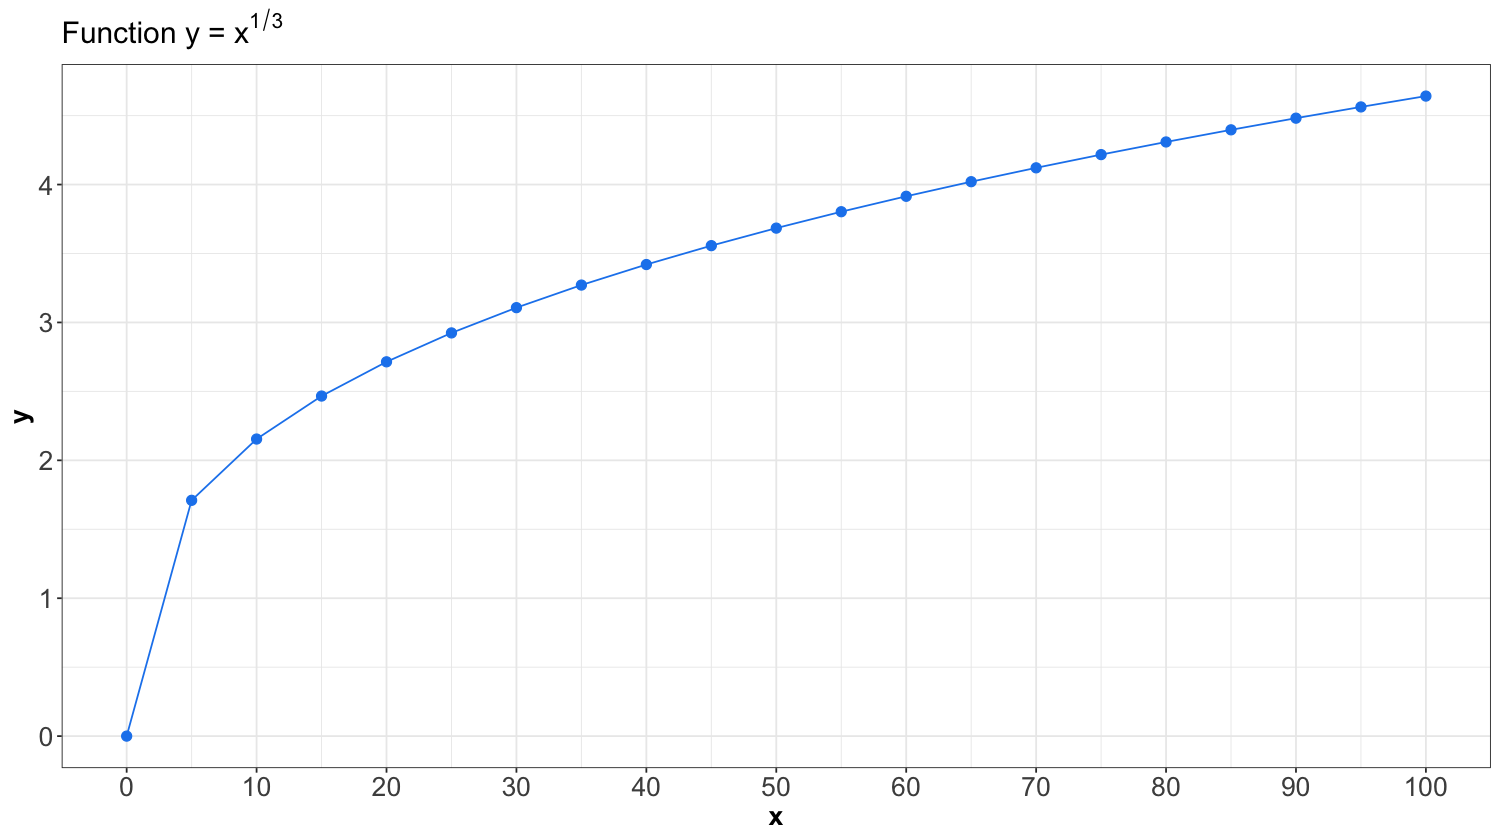

In [19]:
options(repr.plot.width = 12.5)

ggplot(non_linear_pairs, aes(x, y)) +
  geom_point(size = 2.5, colour = "dodgerblue2") +
  geom_line(colour = "dodgerblue2") +
  theme_bw() +
  theme(plot.title = element_text(size = 18),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")) +
  scale_x_continuous(breaks = seq(from = 0, to = 100, by = 10)) +
  scale_y_continuous(breaks = 0:10) +
  ggtitle(expression(paste("Function ", 'y = ', x^{1/3})))

In `R`, the sample Kendall's  $\tau_K$ can be calculated using the `cor()` function with `method = "kendall"`. On the other hand, Pearson's correlation can be computed via `method = "pearson"`.

In [20]:
tribble(
  ~Pearson, ~Kendall,
  round(cor(non_linear_pairs, method = "pearson")[1, 2], 4),
  round(cor(non_linear_pairs, method = "kendall")[1, 2], 4)
) %>%
  kable(align = "cc", format = "html") %>%
  as.character() %>%
  display_html()

Pearson 
 Kendall 
 
 
 
 
 0.9097 
 1

Note that this dataset's sample Pearson's correlation is not 1! Recall it measures linear dependence, which is not true in `non_linear_pairs`. On the other hand, Kendall's $\tau_k$ only measures the strength of **monotonic dependence**; thus, it equals 1.

Now, let us check a different case that does not fit the conditions for Pearson's correlation and Kendall's $\tau_K$.

In [21]:
parabola_pairs <- tibble(x = seq(from = -50, to = 50, by = 5), y = x^2)
parabola_pairs

x   y   
1  -50 2500
2  -45 2025
3  -40 1600
4  -35 1225
5  -30  900
6  -25  625
7  -20  400
8  -15  225
9  -10  100
10  -5   25
11   0    0
12   5   25
13  10  100
14  15  225
15  20  400
16  25  625
17  30  900
18  35 1225
19  40 1600
20  45 2025
21  50 2500

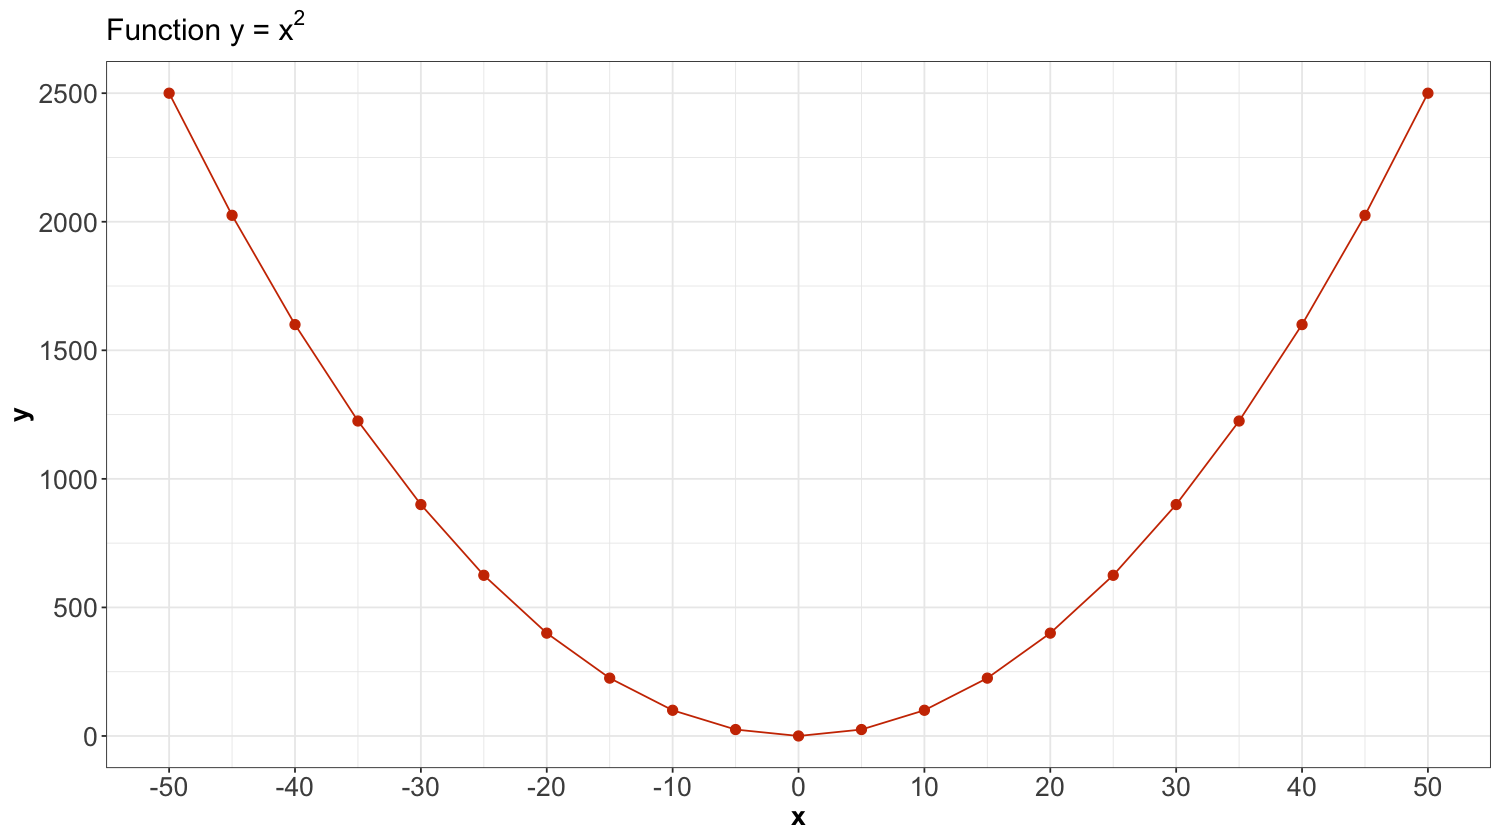

In [22]:
ggplot(parabola_pairs, aes(x, y)) +
  geom_point(size = 2.5, colour = "orangered3") +
  geom_line(colour = "orangered3") +
  theme_bw() +
  theme(plot.title = element_text(size = 18),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")) +
  scale_x_continuous(breaks = seq(from = -50, to = 50, by = 10)) +
  scale_y_continuous(breaks = seq(from = 0, to = 2500, by = 500)) +
  ggtitle(expression(paste("Function ", 'y = ', x^2)))

Patterns like the above parabola are not monotonically increasing or decreasing (i.e., there is no monotonic dependence!). Hence, this matter will not even be captured by Kendall's $\tau_K$ either:

In [23]:
tribble(
    ~ Pearson, ~ Kendall,
    round(cor(parabola_pairs, method = "pearson")[1,2], 4), 
    round(cor(parabola_pairs, method = "kendall")[1,2], 4)
) %>%
  kable(align = "cc", format = "html") %>%
  as.character() %>%
  display_html()

Pearson 
 Kendall 
 
 
 
 
 0 
 0

Even though both dependence measures (Pearson and Kendall) are 0, there is actually deterministic dependence here (i.e., $X$ **determines** $Y$). Luckily, there are many monotonic relationships in practice, making Kendall's $\tau_K$ a handy measure of dependence.

#### 2.2.3. Mutual Information (Optional Section)

Covariance and correlation measure the strength of dependence for numeric random variables, but what about categorical random variables? Back in {doc}`01_lecture-uncertainty`, we saw entropy {eq}`entropy-discrete` as a measure of spread that works even for categorical variables. If covariance is a (multivariate) generalization of variance, do we have a (multivariate) generalization of entropy? The answer is yes! And it is called **mutual information**.

```{admonition} Definition of Mutual Information
:class: tip
The mutual information between two random variables $X$ and $Y$ is defined as

$$H(X,Y) = \displaystyle \sum_x \displaystyle \sum_y P(X = x \cap Y = y)\log\left[\frac{P(X = x \cap Y = y)}{P(X = x) \cdot P(Y = y)}\right].$$
```

```{admonition} Note
:class: warning
Later, you will also encounter **cross-entropy**, which is somewhat related to mutual information, except that it is not symmetric between $X$ and $Y$; that is $H(X , Y) \neq H(Y,X)$. Again, when you get to your Machine Learning courses, the motivation for this will make more sense.
```

### 2.3. Variance of a Sum Involving Two Non-Independent Random Variables

Suppose **$X$ and $Y$ are not independent random variables**. Therefore, the variance of their sum is:

```{math}
:label: variance-dependent-sum
\operatorname{Var}(X + Y) = \operatorname{Var}(X) + \operatorname{Var}(Y) + 2\operatorname{Cov}(X, Y).
```

Furthermore, **if $X$ and $Y$ are independent**, then 

```{math}
:label: cross-independent
\mathbb{E}(XY) = \mathbb{E}(X) \mathbb{E}(Y).
```

Using Equation {eq}`cross-independent`, the covariance is 
```{math}
\begin{align*}
\operatorname{Cov}(X, Y) &=  \mathbb{E}(XY) - \left[ \mathbb{E}(X)\mathbb{E}(Y) \right] \\
&= \left[ \mathbb{E}(X) \mathbb{E}(Y) \right] - \left[ \mathbb{E}(X)\mathbb{E}(Y) \right] \\
& = 0, 
\end{align*}
```
and the sum {eq}`variance-dependent-sum` becomes:
```{math}
\begin{align*}
\operatorname{Var}(X + Y) &= \operatorname{Var}(X) + \operatorname{Var}(Y).
\end{align*}
```